In [1]:
import os, sys
import datetime
from datetime import datetime, date, timedelta
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy import sparse
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pingouin as pg

In [2]:
from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold, GroupKFold, StratifiedGroupKFold, LeaveOneOut, ShuffleSplit, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.dummy import DummyClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import SCORERS, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

In [4]:
iris = load_iris()
logreg = LogisticRegression(max_iter=3000)
scores = cross_val_score(logreg, iris['data'], iris['target'])
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [5]:
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=10)
scores

array([1.        , 0.93333333, 1.        , 1.        , 0.93333333,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [6]:
scores.mean()

0.9733333333333334

In [7]:
res = cross_validate(logreg, iris['data'], iris['target'], return_train_score=True, cv=5)
res

{'fit_time': array([0.01301312, 0.01501441, 0.01100969, 0.01100898, 0.01301146]),
 'score_time': array([0.        , 0.00100112, 0.        , 0.        , 0.        ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [8]:
kfold = KFold(n_splits=5, shuffle=True)
stkfold = StratifiedKFold(n_splits=5, shuffle=True)

In [9]:
cross_val_score(logreg, iris['data'], iris['target'], cv=stkfold)

array([1.        , 0.96666667, 0.96666667, 0.9       , 1.        ])

In [10]:
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=loo)
scores.mean()

0.9666666666666667

In [11]:
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
scores.mean()

0.6722222222222222

In [12]:
rskfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=5)
scores = cross_val_score(logreg, iris['data'], iris['target'], cv=rskfold)
scores.mean()

0.968

In [13]:
X_train_val, X_test, y_train_val, y_test = train_test_split(iris['data'], iris['target'], stratify=iris['target'], random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, stratify=y_train_val, random_state=0)

In [14]:
param_grid = {'C':np.logspace(-2, 2, 5), 'gamma':np.logspace(-2, 2, 5)}
param_grid

{'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
 'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])}

In [15]:
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5, return_train_score=True)
grid.fit(X_train_val, y_train_val)
grid.best_estimator_

SVC(C=10.0, gamma=0.01)

In [16]:
grid.score(X_test, y_test)

1.0

In [17]:
svc = SVC(C=10, gamma=0.1).fit(X_train, y_train)
svc.score(X_test, y_test)

1.0

In [18]:
grid.best_score_

0.9470355731225297

In [19]:
results = pd.DataFrame(grid.cv_results_).T
results

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
mean_fit_time,0.001401,0.001001,0.001001,0.000801,0.001001,0.001001,0.001001,0.000801,0.000801,0.001001,...,0.000601,0.0004,0.001001,0.000801,0.001201,0.000601,0.0008,0.001001,0.001001,0.001001
std_fit_time,0.00049,0.0,0.0,0.0004,0.0,0.000001,0.0,0.000401,0.0004,0.0,...,0.00049,0.00049,0.0,0.000401,0.0004,0.000491,0.0004,0.0,0.0,0.000001
mean_score_time,0.000801,0.000801,0.0002,0.000601,0.0002,0.000601,0.0002,0.0006,0.0004,0.001001,...,0.0004,0.000601,0.0,0.0004,0.0008,0.0004,0.0004,0.0,0.0004,0.001001
std_score_time,0.0004,0.0004,0.0004,0.00049,0.000401,0.000491,0.0004,0.00049,0.00049,0.000001,...,0.00049,0.00049,0.0,0.00049,0.0004,0.00049,0.00049,0.0,0.00049,0.000001
param_C,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,...,10.0,10.0,10.0,10.0,10.0,100.0,100.0,100.0,100.0,100.0
param_gamma,0.01,0.1,1.0,10.0,100.0,0.01,0.1,1.0,10.0,100.0,...,0.01,0.1,1.0,10.0,100.0,0.01,0.1,1.0,10.0,100.0
params,"{'C': 0.01, 'gamma': 0.01}","{'C': 0.01, 'gamma': 0.1}","{'C': 0.01, 'gamma': 1.0}","{'C': 0.01, 'gamma': 10.0}","{'C': 0.01, 'gamma': 100.0}","{'C': 0.1, 'gamma': 0.01}","{'C': 0.1, 'gamma': 0.1}","{'C': 0.1, 'gamma': 1.0}","{'C': 0.1, 'gamma': 10.0}","{'C': 0.1, 'gamma': 100.0}",...,"{'C': 10.0, 'gamma': 0.01}","{'C': 10.0, 'gamma': 0.1}","{'C': 10.0, 'gamma': 1.0}","{'C': 10.0, 'gamma': 10.0}","{'C': 10.0, 'gamma': 100.0}","{'C': 100.0, 'gamma': 0.01}","{'C': 100.0, 'gamma': 0.1}","{'C': 100.0, 'gamma': 1.0}","{'C': 100.0, 'gamma': 10.0}","{'C': 100.0, 'gamma': 100.0}"
split0_test_score,0.652174,0.652174,0.652174,0.565217,0.521739,0.652174,0.869565,0.826087,0.565217,0.521739,...,0.869565,0.869565,0.913043,0.956522,0.608696,0.869565,0.956522,0.956522,0.956522,0.608696
split1_test_score,0.652174,0.652174,0.652174,0.521739,0.434783,0.652174,0.913043,0.956522,0.521739,0.434783,...,0.956522,1.0,0.956522,0.913043,0.565217,1.0,0.956522,0.913043,0.913043,0.565217
split2_test_score,0.318182,0.318182,0.318182,0.318182,0.318182,0.681818,0.954545,0.909091,0.318182,0.318182,...,1.0,0.954545,0.954545,0.863636,0.545455,0.954545,0.954545,0.954545,0.863636,0.545455


In [20]:
scores = np.array(results.T['mean_test_score'].astype('float')).reshape(5, 5)
scores

array([[0.58814229, 0.58814229, 0.57905138, 0.5083004 , 0.40948617],
       [0.73359684, 0.9201581 , 0.91106719, 0.5083004 , 0.40948617],
       [0.90197628, 0.92885375, 0.93754941, 0.91897233, 0.54426877],
       [0.94703557, 0.93754941, 0.93754941, 0.91936759, 0.57114625],
       [0.93754941, 0.94624506, 0.91936759, 0.91936759, 0.57114625]])

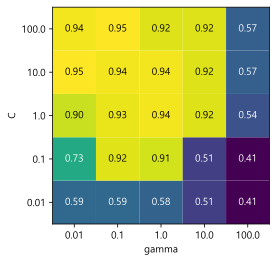

In [21]:
mglearn.tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap='viridis')

In [22]:
param_grid = [{'kernel':['rbf'], 'C':np.logspace(-2, 3, 6), 'gamma':np.logspace(-2, 2, 5)},
{'kernel':['linear'], 'C':np.logspace(-2, 3, 6)}]

In [23]:
grid = GridSearchCV(SVC(), param_grid=param_grid, return_train_score=True, n_jobs=-1)
grid.fit(X_train_val, y_train_val)
grid.best_estimator_

SVC(C=10.0, gamma=0.01)

In [24]:
results = pd.DataFrame(grid.cv_results_).T
results

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.002001,0.001601,0.001201,0.001601,0.002202,0.001402,0.001001,0.001802,0.001201,0.001401,...,0.001001,0.001201,0.001401,0.001202,0.000801,0.000801,0.000801,0.000801,0.000601,0.001201
std_fit_time,0.000633,0.00049,0.0004,0.000491,0.0004,0.00049,0.0,0.0004,0.0004,0.00049,...,0.0,0.0004,0.000491,0.0004,0.0004,0.0004,0.0004,0.0004,0.00049,0.0004
mean_score_time,0.000801,0.000801,0.001001,0.0004,0.001201,0.001001,0.001001,0.0004,0.000801,0.001001,...,0.0004,0.0008,0.000601,0.0004,0.0004,0.000601,0.0004,0.000601,0.001001,0.0002
std_score_time,0.0004,0.0004,0.0,0.00049,0.0004,0.0,0.0,0.00049,0.0004,0.0,...,0.00049,0.0004,0.00049,0.00049,0.000491,0.00049,0.00049,0.00049,0.000001,0.0004
param_C,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,...,1000.0,1000.0,1000.0,1000.0,0.01,0.1,1.0,10.0,100.0,1000.0
param_gamma,0.01,0.1,1.0,10.0,100.0,0.01,0.1,1.0,10.0,100.0,...,0.1,1.0,10.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1.0, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10.0, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100.0, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1.0, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10.0, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100.0, 'kernel': 'rbf'}",...,"{'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1000.0, 'gamma': 1.0, 'kernel': 'rbf'}","{'C': 1000.0, 'gamma': 10.0, 'kernel': 'rbf'}","{'C': 1000.0, 'gamma': 100.0, 'kernel': 'rbf'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1.0, 'kernel': 'linear'}","{'C': 10.0, 'kernel': 'linear'}","{'C': 100.0, 'kernel': 'linear'}","{'C': 1000.0, 'kernel': 'linear'}"
split0_test_score,0.652174,0.652174,0.652174,0.565217,0.521739,0.652174,0.869565,0.826087,0.565217,0.521739,...,0.913043,0.956522,0.956522,0.608696,0.913043,0.869565,0.869565,0.956522,0.913043,0.956522
split1_test_score,0.652174,0.652174,0.652174,0.521739,0.434783,0.652174,0.913043,0.956522,0.521739,0.434783,...,0.956522,0.913043,0.913043,0.565217,0.913043,0.956522,1.0,0.956522,1.0,1.0


In [25]:
grid.best_params_

{'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}

In [26]:
digits = load_digits()
y = digits['target'] == 9
X_train, X_test, y_train, y_test = train_test_split(digits['data'], y, stratify=y, random_state=0)

In [27]:
logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)

In [28]:
conf = confusion_matrix(y_test, logreg.predict(X_test))
conf

array([[402,   3],
       [  5,  40]], dtype=int64)

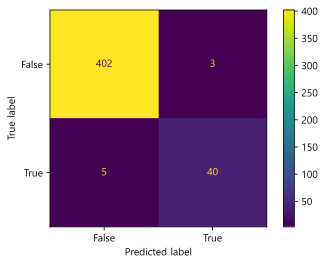

In [29]:
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

In [30]:
f1_score(y_test, logreg.predict(X_test))

0.9090909090909092

In [31]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       405
        True       0.93      0.89      0.91        45

    accuracy                           0.98       450
   macro avg       0.96      0.94      0.95       450
weighted avg       0.98      0.98      0.98       450



In [32]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [37]:
svc = SVC(gamma=0.05, probability=True).fit(X_train, y_train)
svc.score(X_train, y_train), svc.score(X_test, y_test)

(0.9198813056379822, 0.8761061946902655)

In [38]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [40]:
y_pred_new = svc.decision_function(X_test) > -0.8
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [43]:
y_test == svc.predict(X_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [46]:
np.bincount(y_test), np.bincount(svc.predict(X_test)), np.bincount(y_pred_new)

(array([104,   9], dtype=int64),
 array([96, 17], dtype=int64),
 array([85, 28], dtype=int64))

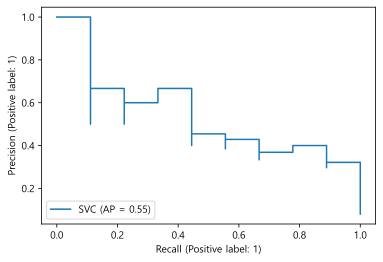

In [47]:
PrecisionRecallDisplay.from_estimator(svc, X_test, y_test)

In [48]:
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [49]:
svc = SVC(gamma=0.05, probability=True).fit(X_train, y_train)
svc.score(X_train, y_train), svc.score(X_test, y_test)

(0.925037037037037, 0.9244444444444444)

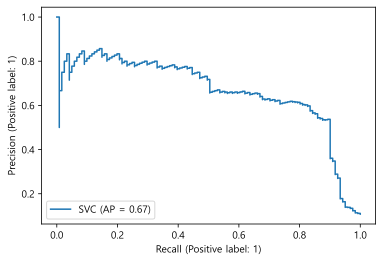

In [52]:
PrecisionRecallDisplay.from_estimator(svc, X_test, y_test)

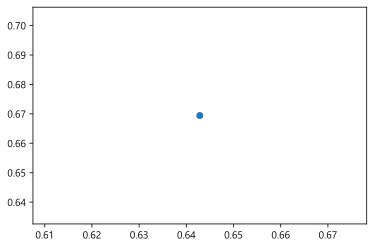

In [65]:
prec, rec, thrs = precision_recall_curve(y_test, svc.decision_function(X_test))
close_zero = np.argmin(np.abs(thrs))
plt.plot(prec[close_zero], rec[close_zero], marker='o')

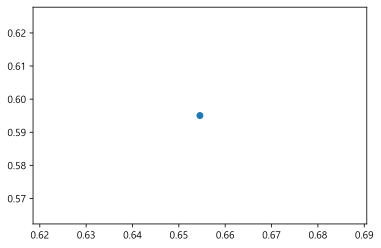

In [68]:
prec, rec, thrs = precision_recall_curve(y_test, svc.predict_proba(X_test)[:, 1])
close_zero = np.argmin(np.abs(thrs - 0.5))
plt.plot(prec[close_zero], rec[close_zero], marker='o')

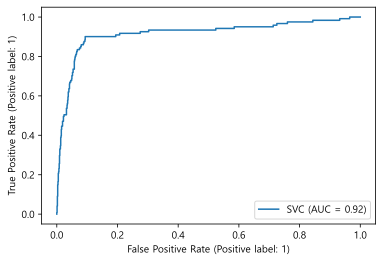

In [69]:
RocCurveDisplay.from_estimator(svc, X_test, y_test)

In [97]:
fpr, tpr, thrs = roc_curve(y_test, svc.predict_proba(X_test)[:, 1])
idx = np.argmin(np.abs(tpr - 0.9))
idx += 1
thrs[idx]

0.04363504354743645

In [101]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1004
           1       0.64      0.67      0.66       121

    accuracy                           0.92      1125
   macro avg       0.80      0.81      0.81      1125
weighted avg       0.93      0.92      0.93      1125



In [102]:
print(classification_report(y_test, svc.predict_proba(X_test)[:, 1] > thrs[idx]))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      1004
           1       0.36      0.90      0.51       121

    accuracy                           0.82      1125
   macro avg       0.67      0.85      0.70      1125
weighted avg       0.92      0.82      0.85      1125

